In [1]:
import tensorflow as tf

In [2]:
import os

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
directory =r"/Users/richardhopkins/Documents/GitHub/k9-assistant/data/"

In [5]:
SIZE = 224

In [6]:
BATCH_SIZE = 5

In [7]:
image_conv = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.3)

In [8]:
train_data = image_conv.flow_from_directory(
    directory, 
    target_size=(SIZE, SIZE), 
    color_mode='rgb', 
    classes=None, 
    class_mode='categorical', 
    batch_size= BATCH_SIZE, 
    shuffle=True,
    subset = 'training'
    )

Found 14 images belonging to 2 classes.


In [9]:
test_data = image_conv.flow_from_directory(
    directory, 
    target_size=(SIZE, SIZE), 
    color_mode='rgb', 
    classes=None, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    shuffle=True,
    subset = 'validation'
)

Found 6 images belonging to 2 classes.


In [10]:
for image_batch, label_batch in train_data:
    break

In [11]:
print(test_data.class_indices)

{'julia': 0, 'richard': 1}


In [12]:
input_shape = train_data.image_shape

In [13]:
labels = '\n'.join(sorted(train_data.class_indices.keys()))
with open('labels.txt', 'w') as f:
    f.write(labels)

In [14]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet')

In [15]:
base_model.trainable = False

In [16]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 2,626,722
Trainable params: 368,738
Non-trainable params: 2,257,984
_________________________________________________________________


In [19]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 4


In [20]:
epochs = 50

In [21]:
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=test_data)

Epoch 1/50
3/3 [==============================] - 2s 503ms/step - loss: 1.0546 - accuracy: 0.4286 - val_accuracy: 0.5000 - val_loss: 0.9022
Epoch 2/50
3/3 [==============================] - 1s 190ms/step - loss: 1.0389 - accuracy: 0.5000 - val_accuracy: 0.5000 - val_loss: 1.1445
Epoch 3/50
3/3 [==============================] - 1s 185ms/step - loss: 0.6011 - accuracy: 0.5714 - val_accuracy: 0.6667 - val_loss: 0.6591
Epoch 4/50
3/3 [==============================] - 1s 207ms/step - loss: 0.2959 - accuracy: 1.0000 - val_accuracy: 0.6667 - val_loss: 0.5305
Epoch 5/50
3/3 [==============================] - 1s 201ms/step - loss: 0.3014 - accuracy: 0.9286 - val_accuracy: 0.6667 - val_loss: 0.5480
Epoch 6/50
3/3 [==============================] - 1s 216ms/step - loss: 0.2741 - accuracy: 0.8571 - val_accuracy: 0.6667 - val_loss: 0.4915
Epoch 7/50
3/3 [==============================] - 1s 238ms/step - loss: 0.1833 - accuracy: 1.0000 - val_accuracy: 0.8333 - val_loss: 0.4294
Epoch 8/50
3/3 [====

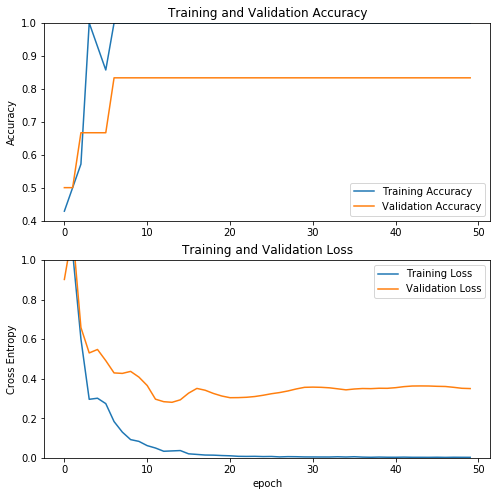

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [23]:
saved_model_dir = './model.h5'
model.save(saved_model_dir)
print("Model Saved to save/fine_tuning.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(model)

#converter = tf.lite.TFLiteConverter.from_keras_model_file(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

Model Saved to save/fine_tuning.h5
